### Caso de uso

ver el movimiento de carga desde Chile a diferentes paises y puertos.


In [ ]:
# Importamos librerias para anlisis de los datos ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
despachos_path = '/content/drive/MyDrive/AnalisisExploratorio/Archivos/'
despachos_df = pd.read_csv(despachos_path + 'Despachos2021.csv', sep=';', encoding='latin-1')

despachos_df.head(5)


,Pais,Puerto,Ancho,Alto,Semana,Enviado,Cantidad
0,CHILE,LAMPA,28.0,80.0,1,06-01-2021,1320
1,CHILE,LAMPA,28.0,80.0,1,08-01-2021,2200
2,CHILE,LAMPA,31.0,80.0,1,08-01-2021,660
3,ARGENTINA,BUENOS AIRES,30.0,80.0,1,08-01-2021,3300
4,ARGENTINA,BUENOS AIRES,30.0,80.0,1,08-01-2021,3300


In [ ]:
despachos_df.dtypes

Pais         object
Puerto       object
Ancho       float64
Alto        float64
Semana        int64
Enviado      object
Cantidad      int64
dtype: object

In [ ]:
despachos_df.describe()

,Ancho,Alto,Semana,Cantidad
count,4689.000000,4687.000000,4719.000000,4719.000000
mean,30.385157,81.009601,16.912058,1313.585929
std,4.237117,1.749493,9.579574,1710.952071
min,16.000000,80.000000,1.000000,4.000000
25%,28.000000,80.000000,9.000000,235.000000
50%,30.000000,80.000000,16.000000,880.000000
75%,34.000000,84.000000,25.000000,1760.000000
max,40.000000,96.000000,34.000000,28160.000000


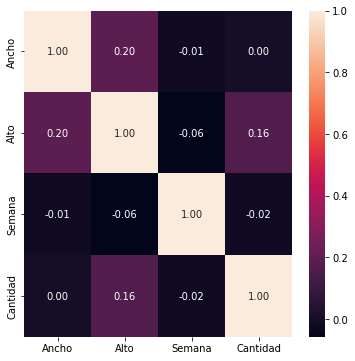

In [ ]:

plt.figure(figsize=(6,6))
sns.heatmap(despachos_df.corr(), annot=True, fmt='.2f') 
plt.show()


Los datos tienen mala correlación, dificilmente se podria inferir algo de ellos

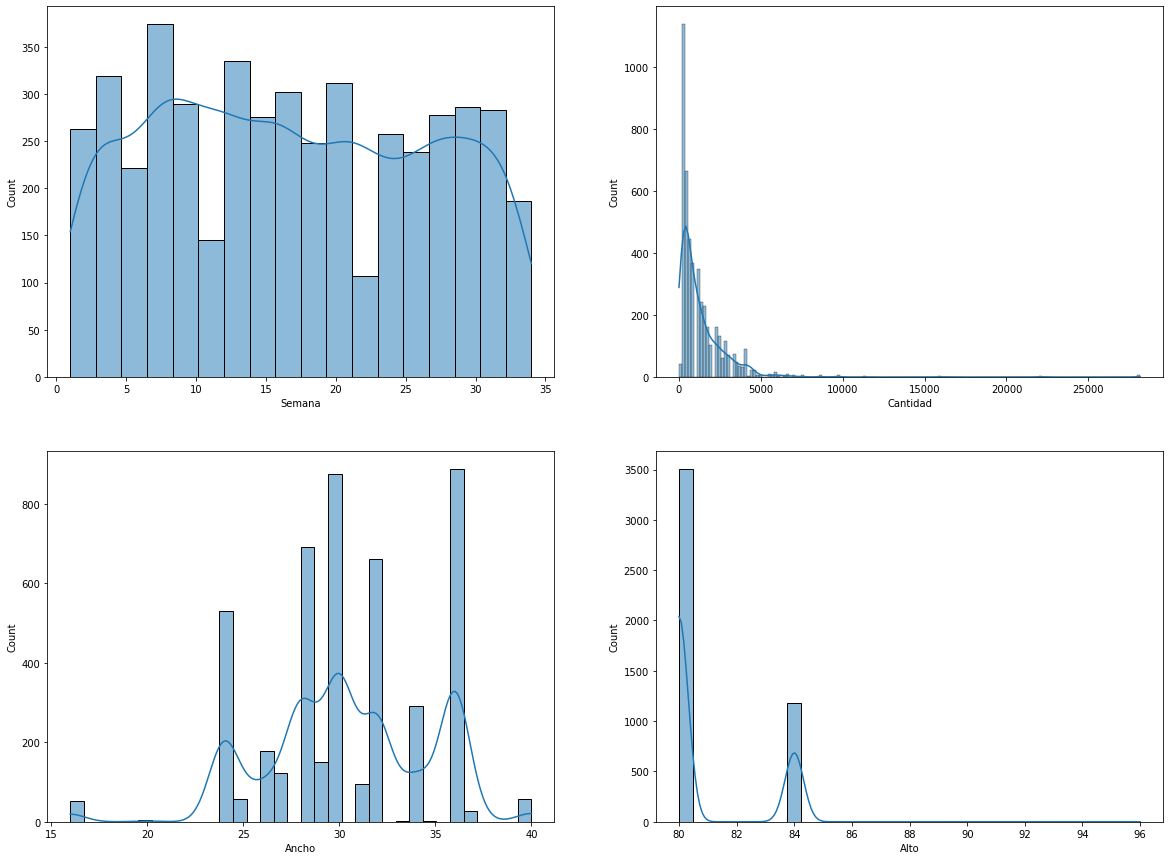

In [ ]:

fig, ax = plt.subplots(2,2, figsize=(20,15) )
#subplots con el método histplot y el gráfico de KDE
sns.histplot(x='Semana', data = despachos_df, kde=True, ax = ax[0,0])
sns.histplot(x='Cantidad', data = despachos_df, kde=True, ax = ax[0,1])
sns.histplot(x='Ancho', data = despachos_df, kde=True, ax = ax[1,0])
sns.histplot(x='Alto', data = despachos_df, kde=True, ax = ax[1,1])
plt.show()

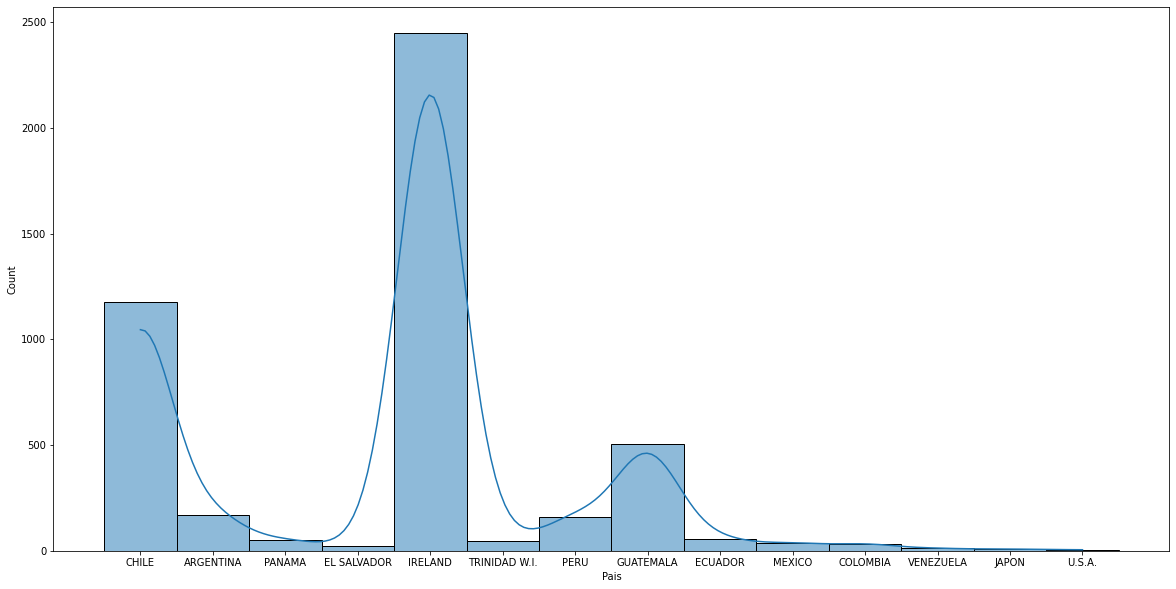

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,10) )
sns.histplot(x='Pais', data = despachos_df, kde=True, ax = ax)
plt.show()

Analizar los datos de Chile, Irlanda y Guatemala.

In [ ]:
#Separa los tres paises con mas movimiento
despachos_a = despachos_df.loc[(despachos_df['Pais'] == 'CHILE') | (despachos_df['Pais'] == 'IRELAND')  | (despachos_df['Pais'] == 'GUATEMALA') ]  




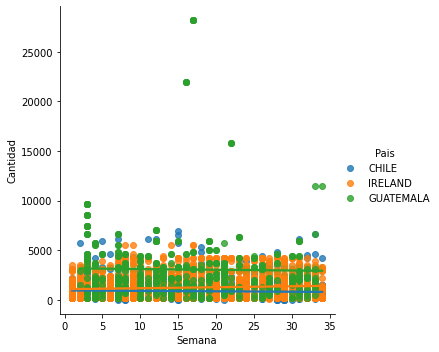

In [ ]:
sns.lmplot(data=despachos_a, x='Semana', y='Cantidad', hue="Pais")
plt.show()

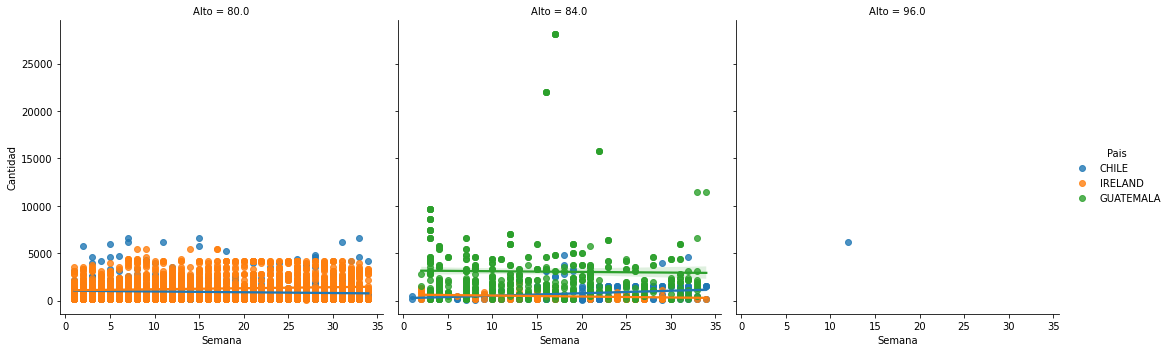

In [ ]:
sns.lmplot(data=despachos_a, x='Semana', y='Cantidad', hue="Pais", col="Alto")
plt.show()


Los items con altura 80 se envian principalmente a Irlanda y los de 84 a Guatemala.



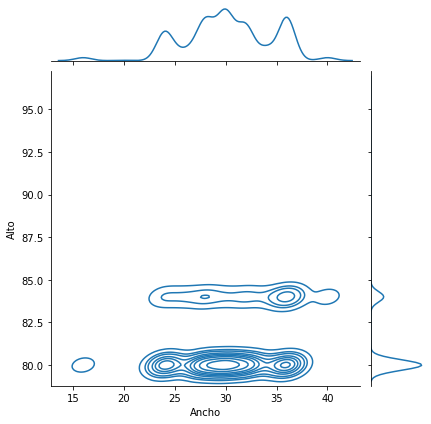

In [ ]:
sns.jointplot(data=despachos_a, x='Ancho', y='Alto', kind="kde")
plt.show()

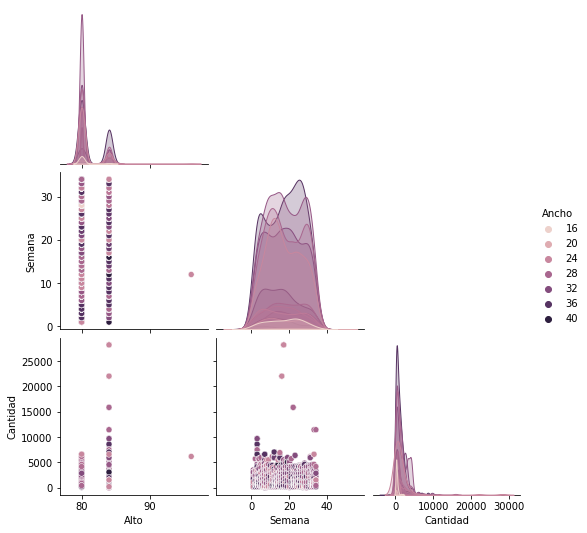

In [ ]:
sns.pairplot(data=despachos_a, corner=True, hue='Ancho')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


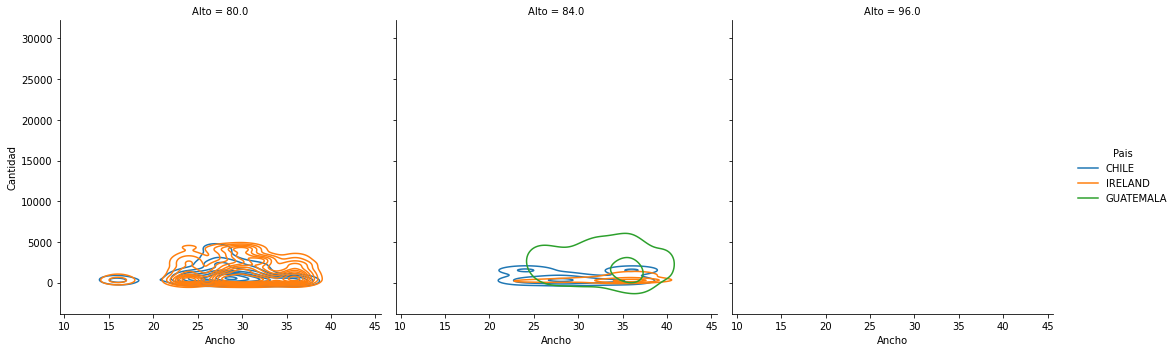

In [ ]:
sns.displot(data=despachos_a, x="Ancho", y="Cantidad", hue="Pais", col="Alto", kind="kde");
plt.show()

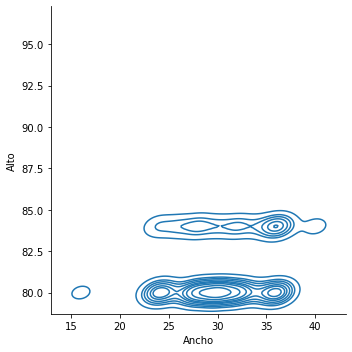

In [ ]:
sns.displot(data=despachos_a, x="Ancho", y="Alto", kind="kde");
plt.show()

los datos por si solos no son insuficientes para hacer alguna estimación significativa, se requiere atributos adicionales de cada envio para mejorar el analisis. 